# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
from pprint import pprint
from urllib.error import HTTPError

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

## Generate Cities List

In [14]:
# List for holding lat_longs and cities
lat_longs = []
cities = []

# Create a set of random lat and long combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, long combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
settings = {"units": "imperial", "appid": api_key}

In [16]:
#creates dataframe with cities and adds the empty columns for data to be added
weather_df = pd.DataFrame()
weather_df['City'] = cities
weather_df['Cloudiness'] = ""
weather_df['Country'] = ""
weather_df['Date'] = ""
weather_df['Humidity'] = ""
weather_df['Lat'] = ""
weather_df['Long'] = ""
weather_df['Max Temp'] = ""
weather_df['Wind Speed'] = ""

i = 0 #use i as counter for record number since idexes may not match the record number if we skip a record
print("Beginning Data Retrieval")
print("------------------------")
for index, row in weather_df.iterrows():
    #tries to get request the weather for the current city, if it exists adds all the info for that city into data frame
    #and prints processing record number and city name
    try:
        current_weather= owm.get_current(row[0], **settings)
        weather_df.loc[index, 'Cloudiness']= current_weather["clouds"]["all"]
        weather_df.loc[index, 'Country']= current_weather["sys"]["country"]
        weather_df.loc[index, 'Date']=current_weather["dt"]
        weather_df.loc[index, 'Humidity']=current_weather["main"]["humidity"]
        weather_df.loc[index, 'Lat']=current_weather["coord"]["lat"]
        weather_df.loc[index, 'Long']=current_weather["coord"]["lon"]
        weather_df.loc[index, 'Max Temp']=current_weather["main"]["temp_max"]
        weather_df.loc[index, 'Wind Speed']=current_weather["wind"]["speed"]
        print(f"Processing Record {i%50} of Set {i//50 +1} | {row[0]}")
        i = i + 1
    #if gets HTTPError because no data for that city, will print city not found and adds none as the value to cloudiness
    except HTTPError:
        print(f"City not found. Skipping...")
        weather_df.loc[index, 'Cloudiness']= None
    time.sleep(1)
print("------------------------")  
print("Data Retrieval Complete")
print("------------------------")  

Beginning Data Retrieval
------------------------
City not found. Skipping...
Processing Record 0 of Set 1 | arlit
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | hilo
Processing Record 3 of Set 1 | bontang
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | denpasar
Processing Record 7 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | butaritari
City not found. Skipping...
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | saurimo
Processing Record 14 of Set 1 | toccoa
Processing Record 15 of Set 1 | ketchikan
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | mbanza-ngungu
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | cabo san lucas


Processing Record 30 of Set 4 | cap malheureux
Processing Record 31 of Set 4 | de-kastri
Processing Record 32 of Set 4 | melo
Processing Record 33 of Set 4 | penzance
Processing Record 34 of Set 4 | athabasca
Processing Record 35 of Set 4 | provideniya
Processing Record 36 of Set 4 | kahului
Processing Record 37 of Set 4 | zhigansk
Processing Record 38 of Set 4 | kavaratti
Processing Record 39 of Set 4 | qandala
Processing Record 40 of Set 4 | mount isa
Processing Record 41 of Set 4 | nagapattinam
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | evensk
Processing Record 44 of Set 4 | faanui
City not found. Skipping...
Processing Record 45 of Set 4 | pizarro
Processing Record 46 of Set 4 | westport
Processing Record 47 of Set 4 | hopfgarten
City not found. Skipping...
Processing Record 48 of Set 4 | aklavik
Processing Record 49 of Set 4 | morehead
Processing Record 0 of Set 5 | san juan
City not found. Skipping...
Processing Record 1 of Set 5 | mapiripan
Pro

Processing Record 17 of Set 8 | sibolga
Processing Record 18 of Set 8 | lagoa
Processing Record 19 of Set 8 | adeje
Processing Record 20 of Set 8 | narimanov
City not found. Skipping...
Processing Record 21 of Set 8 | mokolo
Processing Record 22 of Set 8 | marsa matruh
Processing Record 23 of Set 8 | beringovskiy
City not found. Skipping...
Processing Record 24 of Set 8 | ushtobe
Processing Record 25 of Set 8 | amarante
Processing Record 26 of Set 8 | grand gaube
Processing Record 27 of Set 8 | hericourt
Processing Record 28 of Set 8 | lindas
Processing Record 29 of Set 8 | farafangana
Processing Record 30 of Set 8 | khartoum
City not found. Skipping...
Processing Record 31 of Set 8 | singapore
Processing Record 32 of Set 8 | bloomfield
Processing Record 33 of Set 8 | zhelyabovka
Processing Record 34 of Set 8 | nantucket
Processing Record 35 of Set 8 | quisao
Processing Record 36 of Set 8 | darhan
Processing Record 37 of Set 8 | kieta
Processing Record 38 of Set 8 | rio gallegos
Proces

Processing Record 1 of Set 12 | laguna
City not found. Skipping...
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#drops the rows that contain none in cloudiness and resets index
weather_df = weather_df.mask(weather_df.eq('None')).dropna()
weather_df = weather_df.reset_index(drop=True)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,arlit,100,NE,1566692800,63,18.74,7.39,78.5,22.41
1,rikitea,84,PF,1566692718,70,-23.12,-134.97,69.68,21.83
2,hilo,90,US,1566692754,65,19.71,-155.08,82.4,13.53
3,bontang,98,ID,1566692803,94,0.12,117.47,77.24,2.95
4,punta arenas,75,CL,1566692805,70,-53.16,-70.91,42.8,13.87


In [18]:
weather_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Long          552
Max Temp      552
Wind Speed    552
dtype: int64

In [19]:
weather_df.to_csv('weather_data.csv', index = False) #saves to csv

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

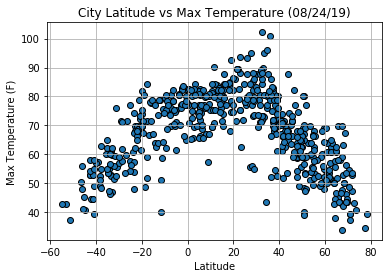

In [20]:
#creates scatter plot for lat and temp and then saves it
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", edgecolor='black')
plt.title("City Latitude vs Max Temperature (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig('Pictures/Lat_Temp_Plot.png')

#### Latitude vs. Humidity Plot

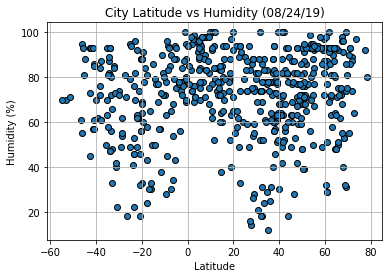

In [21]:
#creates scatter plot for lat and humidity and then saves it
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", edgecolor='black')
plt.title("City Latitude vs Humidity (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig('Pictures/Lat_Humidity_Plot.png')

#### Latitude vs. Cloudiness Plot

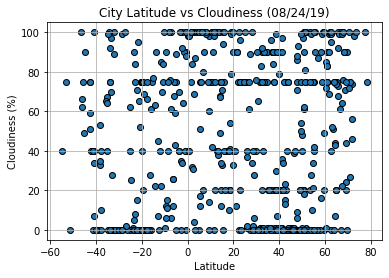

In [22]:
#creates scatter plot for lat and cloudiness and then saves it
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", edgecolor='black')
plt.title("City Latitude vs Cloudiness (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig('Pictures/Lat_Cloudiness_Plot.png')

#### Latitude vs. Wind Speed Plot

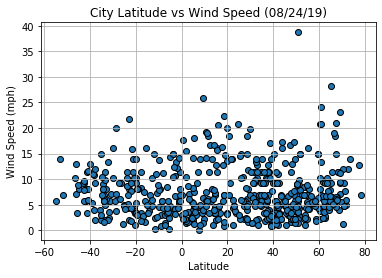

In [23]:
#creates scatter plot for lat and wind speed and then saves it
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", edgecolor='black')
plt.title("City Latitude vs Wind Speed (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig('Pictures/Lat_Wind_Plot.png')

### Data Observations

1. As the latitude approaches zero, from both the positive and negative directions, the temperature rises. As you move farther away from 0, it begins to fall. 
2. The majority of cities had a humidity above 40%, but there is no reletionship between humidity and latitude.
3. The majority of cities had a wind speed below 10mph, but there is no relationship between wind speed and latitude. 
4. There is no observable trend between cloudiness and latitude.